<a href="https://colab.research.google.com/github/maurya-anuj/Eip4/blob/master/Assign2/Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -r '/content/gdrive/My Drive/EIP4_assign2/batch_drop25(10,20,30|10|10,15,30)'


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'EIP4_assign2/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import files
!zip -r '/content/batch_drop25(10,15,30|10|15,30).zip' '/content/batch_drop25(10,30|10|20,30)'
files.download("/content/batch_drop25(10,30|10|20,30).zip")

  adding: content/batch_drop25(10,30|10|20,30)/ (stored 0%)
  adding: content/batch_drop25(10,30|10|20,30)/batch_drop25(10,30|10|20,30).txt (deflated 83%)
  adding: content/batch_drop25(10,30|10|20,30)/batch_drop25(10,30|10|20,30).json (deflated 91%)
  adding: content/batch_drop25(10,30|10|20,30)/batch_drop25(10,30|10|20,30).h5 (deflated 44%)


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.layers import Flatten, Dropout
from keras.layers import Activation
from contextlib import redirect_stdout
import os


model_name = "batch_drop25(10,30|10|10,15,40)"
path = base_dir
print("The current working directory is %s" % path)

directory = os.path.join(path, model_name)
Parameter_file = os.path.join(directory, model_name+'.txt')
json_file = os.path.join(directory, model_name+'.json')

# create directory if not exist
if not os.path.exists(directory):
    print("\n\n\n .... \n\n")
    os.makedirs(directory)


# Print Model to text file
def myprint(s):
    with open(Parameter_file, 'w') as f:
        with redirect_stdout(f):
            model.summary()


model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False))  # 26
model.add(BatchNormalization())
# model.add(Convolution2D(15, 3, 3, activation='relu', use_bias=False))  # 24
# model.add(BatchNormalization())
model.add(Convolution2D(30, 3, 3, activation='relu', use_bias=False))  # 24
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(2, 2))  # 12
model.add(Convolution2D(10, 1, activation='relu', use_bias=False))  # 12
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False))  # 10
model.add(BatchNormalization())
model.add(Convolution2D(15, 3, 3, activation='relu', use_bias=False))  # 8
model.add(BatchNormalization())
model.add(Convolution2D(40, 3, 3, activation='relu', use_bias=False))  # 6
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, use_bias=False))
model.add(BatchNormalization())
model.add(Convolution2D(10, 6, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))

# Save mode to json file
model_json = model.to_json()
with open(json_file, 'w') as json_file:
    json_file.write(model_json)


model.summary(print_fn=myprint)


'''
10,30|10|15,30
10,15,30|10|15,30 *
10,10,30|10|10,30
10,10,30|10|10,15,30
10,15,30|10|10,15,30
10,30|10|10,10,15,30
10,30|10|10,10,15,40 dosen't look good loss not getting reduced 
10,30|10|10,15,30 best for now
10,30|10|10,20,30

'''


The current working directory is /content/gdrive/My Drive/EIP4_assign2/



 .... 




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), activation="relu", use_bias=False)`


"\n10,30|10|15,30\n10,15,30|10|15,30 *\n10,10,30|10|10,30\n10,10,30|10|10,15,30\n10,15,30|10|10,15,30\n10,30|10|10,10,15,30\n10,30|10|10,10,15,40 dosen't look good loss not getting reduced \n10,30|10|10,15,30 best for now\n10,30|10|10,20,30\n\n"

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
batch_drop25(10,30|10|15,30)
batch_drop25(10,10,30|10|10,30)
batch_drop25(10,10,30|10|15,30)
batch_drop25(10,10,30|10|10,15,30)
batch_drop25(10,15,30|10|10,15,30)
batch_drop25(10,30|10|10,10,15,30)
batch_drop25(10,30|10|10,10,15,40)
batch_drop25(10,30|10|10,30|10|40)
batch_drop25(10,30|10|20,30|10|40)
batch_drop25(10,30|10|20,30|10|30)
batch_drop25(10,30|10|10,15,30)
batch_drop25(10,30|10|10,20,30)
Inside Dir batch_drop25(10,30|10|10,20,30)
Again with lr


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Saved model to disk
Again with lr


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Saved model to disk
Again with lr


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Saved model to disk


"\ndef scheduler(epoch, lr):\n  return round(0.003 * 1/(1 + 0.319 * epoch), 10)\n\nmodel.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])\n\nmodel.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])\n"

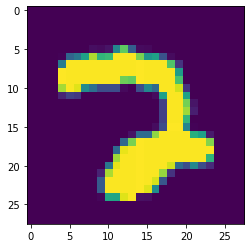

In [0]:
# -*- coding: utf-8 -*-
"""Copy of 1st DNN.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1xRI9PI5w4HcK5yBhquGE0RUtogqm2ay9

# **Import Libraries and modules**
"""

# https://keras.io/
# !pip install -q keras
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json
import os

import sys

from keras.datasets import mnist

"""### Load pre-shuffled MNIST data into train and test sets"""

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Commented out IPython magic to ensure Python compatibility.
print(X_train.shape)
from matplotlib import pyplot as plt
# %matplotlib inline
plt.imshow(X_train[120])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)
print(X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#y_train[:10]

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#Y_train[4:10]

# from keras.layers import Activation
# model = Sequential()
#
#
# model.add(Convolution2D(60, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(30, 3, 3, activation='relu'))
# #model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Convolution2D(60, 3, 3, activation='relu'))
# model.add(Convolution2D(100, 3, 3, activation='relu'))
# #model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 1))
# model.add(Convolution2D(10, 8))
# model.add(Flatten())
# model.add(Activation('softmax'))

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

batches = [64,128,256]
model_json = ""
directory = "/content/gdrive/My Drive/EIP4_assign2/"
for file in os.listdir(directory):
    print(file)
    if file[0] != '.' and not os.path.isfile(directory+file+"/"+file+".h5"):
        print("Inside Dir %s"%file)
        for f in os.listdir(os.path.join(directory, file)):
            if f.endswith(".json"):
                json_path = os.path.join(directory, file, f)
                with open(json_path, 'r') as json_file:
                    model_json = json_file.read()
                model = model_from_json(model_json)

                # # open log file
                # oldStdout = sys.stdout
                # file_out = open(os.path.join(directory, file, file+'.txt'), 'a')
                # sys.stdout = file_out

                # model.compile(loss='categorical_crossentropy',
                #               optimizer='adam',
                #               metrics=['accuracy'])
                # model.fit(X_train, Y_train, batch_size=30, nb_epoch=25, validation_data=(X_test, Y_test),  verbose=2)
                # sys.stdout = oldStdout

                # # serialize weights to HDF5
                # model.save_weights(os.path.join(directory, file, file+".h5"))
                # print("Saved model to disk")


                for batch in batches:
                    
                    ### again with adam(lr)     
                    print("Again with lr")           
                    model = model_from_json(model_json)

                    # open log file
                    oldStdout = sys.stdout
                    file_out = open(os.path.join(directory, file, file+'.txt'), 'a')
                    sys.stdout = file_out
                    print("\n batch size = %s \n"%str(batch))

                    model.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(lr=0.003),
                                  metrics=['accuracy'])
                    model.fit(X_train, Y_train, batch_size=batch, nb_epoch=25, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)],  verbose=2)
                    sys.stdout = oldStdout

                    # serialize weights to HDF5
                    model.save_weights(os.path.join(directory, file, file+"_"+str(batch)+"_lr.h5"))
                    print("Saved model to disk")



'''
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
'''

In [0]:
os.path.isfile(base_dir+"batch_drop25(10,30|10|15,30)/batch_drop25(10,30|10|15,30).h5")

True